In [1]:
!python datasets.py

In [2]:
import math
import numpy as np
import scipy
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as skl
import io
import pickle

from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.dummy import DummyRegressor

from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance

In [3]:


import datasets

DS = datasets.Datasets()



In [4]:
nonTwitterDf = DS.non_twitter_df

In [5]:
import math
## maybe balance the number of tweets from each?
dfH = nonTwitterDf.loc[nonTwitterDf['Candidate']=='HC',:]
print("HC length: ",len(dfH))

dfT =nonTwitterDf.loc[nonTwitterDf['Candidate']=='DT',:]
print("DT length: ",len(dfT))

#print(.5*(len(dfT)/len(dfH))

df_new = nonTwitterDf

#df_new = df.append(dfH)
df_new = df_new.append(dfH)
#df_new = df_new.append(dfH[:math.floor(len(dfH)*.33)])
print("DT length ratio: ",len(dfT)/len(df_new))

nonTwitterDf = df_new

HC length:  1352
DT length:  2509
DT length ratio:  0.48129675810473815


In [94]:
##sum(list(twitter.loc[:,"Num Prop"]==0))## this confirms that there is always at least one instance of propaganda

0

In [6]:
from sklearn.model_selection import train_test_split

X = nonTwitterDf.loc[:,'Loaded_Language':'Thought-terminating_Cliches',]
Y = nonTwitterDf.loc[:,"BCandidate"]


X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = .2,shuffle=True)

In [10]:
from sklearn import linear_model

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.dummy import DummyRegressor

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
#models.append(('SVM', SVC(gamma='auto'))) 
models.append(('ETC', ExtraTreesClassifier(n_estimators=100, random_state=0)))
models.append(('RFC', RandomForestClassifier(max_depth= 2, random_state = 0)))  
models.append(('null0', DummyRegressor(strategy="constant", constant= 0)))
models.append(('null1', DummyRegressor(strategy="constant", constant= 1)))


results = []
names = []
roc_auc= []
fitted_mods=[]
conf_mat= []
predictions = []


for name, model in models: 
    print(model)
    print(name)
    fitted_mods.append(model.fit(X_train, Y_train))
 
    names.append(name)
    
for i in fitted_mods: 
	roc_auc.append(roc_auc_score(Y_test,i.predict(X_test)))
	results.append(accuracy_score(Y_test, i.predict(X_test)))

#	conf_mat.append(confusion_matrix(Y_test, i.predict(X_test)))
 
	predictions.append(i.predict(X_test))
 
#print(roc_auc)
print(results)
print(conf_mat)
print(predictions)

LogisticRegression(multi_class='ovr', solver='liblinear')
LR
ExtraTreesClassifier(random_state=0)
ETC
RandomForestClassifier(max_depth=2, random_state=0)
RFC
DummyRegressor(constant=0, strategy='constant')
null0
DummyRegressor(constant=1, strategy='constant')
null1
[0.6400986031224322, 0.647493837304848, 0.6253081347576006, 0.5094494658997535, 0.4905505341002465]
[]
[array([1, 0, 1, ..., 1, 0, 1], dtype=int64), array([1, 1, 1, ..., 1, 0, 1], dtype=int64), array([0, 1, 0, ..., 1, 0, 0], dtype=int64), array([0, 0, 0, ..., 0, 0, 0]), array([1, 1, 1, ..., 1, 1, 1])]


LR accuracy: 0.6400986031224322 roc auc: 0.6404360512238612
ETC accuracy: 0.647493837304848 roc auc: 0.649185443345761
RFC accuracy: 0.6253081347576006 roc auc: 0.623682930782947
null0 accuracy: 0.5094494658997535 roc auc: 0.5
null1 accuracy: 0.4905505341002465 roc auc: 0.5


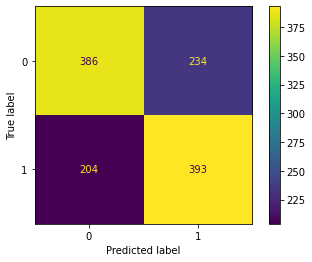

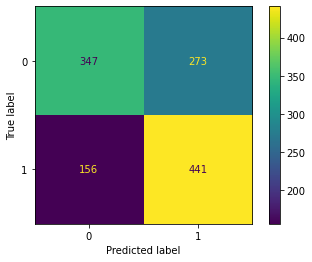

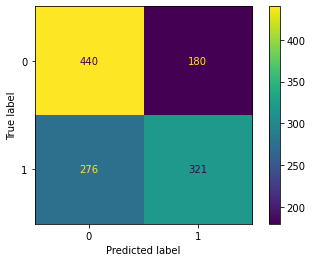

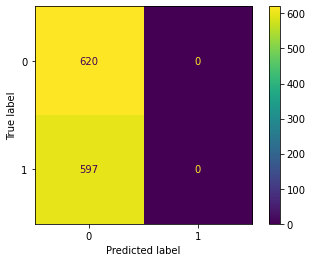

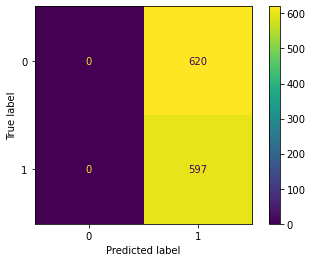

In [21]:
## printing imporant stats
for i in range(len(names)):
  print(names[i],'accuracy:' , results[i], 'roc auc:',roc_auc[i])
  cm = confusion_matrix(Y_test,predictions[i])
  ConfusionMatrixDisplay(cm).plot()

plt.show()

# cross validated gridsearches:

## C-Support Vector Classification

In [7]:
granularity1 = 10 ## make smaller when running on a more powerful computer

In [8]:
from sklearn.model_selection import GridSearchCV
# support vector machine

SVCCV = GridSearchCV(
SVC(gamma='auto'), param_grid = { 
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'C' : list(range(1,30))


})

SVCCV.fit(X_train,Y_train)

GridSearchCV(estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                               27, 28, 29],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [9]:
filename = 'SVC_GS_nontwitter'
pickle.dump(SVCCV, open(filename,'wb'))

In [10]:
##reading in trained model
loaded_model = pickle.load(open(filename, 'rb'))


SVC_GS_twitter results on test data
roc_auc: 0.539344262295082
accurarcy: 0.5560882070949185
note 1 is Donald Trump


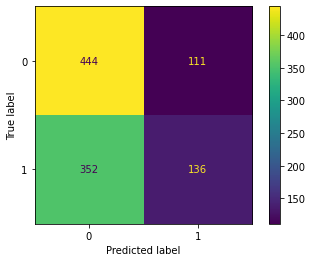

In [11]:
print(filename+" results on test data")
print("roc_auc:",roc_auc_score(Y_test,loaded_model.predict(X_test)))
print("accurarcy:",accuracy_score(Y_test,loaded_model.predict(X_test)))
print("note 1 is Donald Trump")
cm = confusion_matrix(Y_test,loaded_model.predict(X_test))
ConfusionMatrixDisplay(cm).plot()


## extra trees

In [12]:

ETCV = GridSearchCV(ExtraTreesClassifier(),param_grid = {
    'n_estimators' : list(range(1,100,granularity1)),# no real benefit from 1,100
    'random_state' : list(range(1,100,granularity1))
})

ETCV.fit(X_train,Y_train)

filename = 'extra_trees_GS_nontwitter'
pickle.dump(ETCV, open(filename,'wb')) 


extra_trees_GS_twitter results on test data
roc_auc: 0.5471163786737557
accurarcy: 0.5656759348034516
note 1 is Donald Trump


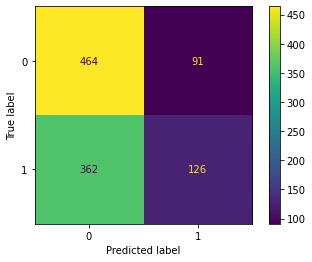

In [13]:
loaded_model = pickle.load(open(filename, 'rb'))

print(filename+" results on test data")
print("roc_auc:",roc_auc_score(Y_test,loaded_model.predict(X_test)))
print("accurarcy:",accuracy_score(Y_test,loaded_model.predict(X_test)))
print("note 1 is Donald Trump")
cm = confusion_matrix(Y_test,loaded_model.predict(X_test))
ConfusionMatrixDisplay(cm).plot()

In [14]:
scoring = ['roc_auc', 'accuracy']#
r_multi = permutation_importance(
    ETCV, X_test, Y_test, n_repeats=30, random_state=0, scoring=scoring)

features= list(nonTwitterDf.columns)[6:-2]
roc_auc_importance = []
roc_auc_std = []
acc_importance =[]
acc_std=[]
for metric in r_multi:
    print(f"{metric}")
    r = r_multi[metric]
    for i in range(len(features)):
        #if r.importances_mean[i] - 2 * r.importances_std[i] > 0: ## do we want to know this?
        print(i,f"    {list(nonTwitterDf.columns)[6:-2][i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")
        if metric == 'roc_auc':
            roc_auc_importance.append(r.importances_mean[i])
            roc_auc_std.append(r.importances_std[i])
        if metric == 'accuracy': 
            acc_importance.append(r.importances_mean[i])
            acc_std.append(r.importances_std[i])

NameError: name 'twitter' is not defined

In [ ]:

plt.figure(figsize=(15, 4))# this adjusts how far away the plots are from eachother

ax = plt.subplot(121)
ax.bar(features,acc_importance)
plt.xticks(rotation = 'vertical')
ax.set_title("Feature importance of Random Forest based on accuracy")
ax.set_ylabel("permutation importance")

ax = plt.subplot(122)## this is to put them next to each other and needs to be 1 integer greater
ax.bar(features,roc_auc_importance)
plt.xticks(rotation = 'vertical')
ax.set_title("Feature importance of Random Forest based on roc_auc")
ax.set_ylabel("permutation importance")
plt.show()

## random forest

In [ ]:
RFCV = GridSearchCV(RandomForestClassifier(), param_grid={ 
    'n_estimators' : list(range(1,100,granularity1)),
    'max_depth': list(range(2,100,granularity1)),
    'random_state': list(range(10,100,granularity1))

})
RFCV.fit(X_train,Y_train)

filename = 'RFCV_GS_nontwitter'
pickle.dump(RFCV, open(filename,'wb'))


In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))

print(filename+" results on test data")
print("roc_auc:",roc_auc_score(Y_test,loaded_model.predict(X_test)))
print("accurarcy:",accuracy_score(Y_test,loaded_model.predict(X_test)))
print("note 1 is Donald Trump")
cm = confusion_matrix(Y_test,loaded_model.predict(X_test))
ConfusionMatrixDisplay(cm).plot()

In [ ]:
## source: https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance



scoring = ['roc_auc', 'accuracy']#
r_multi = permutation_importance(
    RFCV, X_test, Y_test, n_repeats=30, random_state=0, scoring=scoring)

features= list(nonTwitterDf.columns)[6:-2]
roc_auc_importance = []
roc_auc_std = []
acc_importance =[]
acc_std=[]
for metric in r_multi:
    print(f"{metric}")
    r = r_multi[metric]
    for i in range(len(features)):
        #if r.importances_mean[i] - 2 * r.importances_std[i] > 0: ## do we want to know this?
        print(i,f"    {list(nonTwitterDf.columns)[6:-2][i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")
        if metric == 'roc_auc':
            roc_auc_importance.append(r.importances_mean[i])
            roc_auc_std.append(r.importances_std[i])
        if metric == 'accuracy': 
            acc_importance.append(r.importances_mean[i])
            acc_std.append(r.importances_std[i])

In [ ]:

plt.figure(figsize=(15, 4))# this adjusts how far away the plots are from eachother

ax = plt.subplot(121)
ax.bar(features,acc_importance)
plt.xticks(rotation = 'vertical')
ax.set_title("Feature importance of Random Forest based on accuracy")
ax.set_ylabel("permutation importance")

ax = plt.subplot(122)## this is to put them next to each other and needs to be 1 integer greater
ax.bar(features,roc_auc_importance)
plt.xticks(rotation = 'vertical')
ax.set_title("Feature importance of Random Forest based on roc_auc")
ax.set_ylabel("permutation importance")
plt.show()


## lasso

In [ ]:
LOCV = GridSearchCV( linear_model.Lasso(), param_grid={ 
    'alpha' : list(np.arange (.1, 50, .1))

})
LOCV.fit(X_train,Y_train)

filename = 'lasso_GS_nontwitter'
pickle.dump(LOCV, open(filename,'wb')) 

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))

print(filename+" results on test data")
print("roc_auc:",roc_auc_score(Y_test,loaded_model.predict(X_test)))
print("accurarcy:",accuracy_score(Y_test,loaded_model.predict(X_test)))
print("note 1 is Donald Trump")
cm = confusion_matrix(Y_test,loaded_model.predict(X_test))
ConfusionMatrixDisplay(cm).plot()

In [ ]:
## no feature importance?
## everything is 0 when computed 

## neural net- may need to adjust parameters

In [ ]:
NNCV = GridSearchCV( MLPClassifier(max_iter=10000), param_grid={ 
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'alpha' : [1e-5,1e-4,1e-3,1e-2],
    'activation': ['tanh', 'relu'],
    'learning_rate': ['constant','adaptive'],

})
NNCV.fit(X_train,Y_train)

filename = 'NNCV_GS_nontwitter'
pickle.dump(NNCV, open(filename,'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))

print(filename+" results on test data")
print("roc_auc:",roc_auc_score(Y_test,loaded_model.predict(X_test)))
print("accurarcy:",accuracy_score(Y_test,loaded_model.predict(X_test)))
print("note 1 is Donald Trump")
cm = confusion_matrix(Y_test,loaded_model.predict(X_test))
ConfusionMatrixDisplay(cm).plot()